#####  PREDICTIVE ANALYTICS APPROACH TO UNDERSTANDING CUSTOMER RETENTION

##### TABLE OF CONTENTS
* [Business Understanding](#1-business-understanding)
    * [Stakeholders](#11-stakeholders)
    * [Objectives](#2-objectives)
* [Data Understanding](#3-data-understanding)
    * [Data Source](#31-source-of-data)
    * [Loading Data](#31-loading-data-set)
    * [Data Features](#32-data-features)
* [Data Preparation](#40-data-preparation)
* [Modeling](#50-modeling)
    * [Logistic Regrassion](#51-logistic-regression)
    * [Decision Tree](#52-decision-tree)
    * [Random Forest](#53-random-forest)
* [Model Evaluation](#60-model-evaluation)
    * [Model Selection](#61-final-model-selection)
    * [Feature Importance](#62-feature-importance)
* [Recommendations](#70-recommendations)

##### 1.0 BUSINESS UNDERSTANDING

Customers leaving a business is a challenge concern as it affects the profits being made and cuts growth opportunities. This is an even greater problem in the telecommunications sector as it is always much cheaper to maintain existing users than to recruit new ones. Knowing the reasons behind customer churn and being able to make accurate predictions on how many customers are likely to leave enables the firm to take appropriate proactive retention measures. The goal of this project is to examine the customers’ data to determine the characteristics that surround churn in order to create a predictive model to preemptively manage customer attrition.
Most naturally, the audience of this project is the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question then would be: are there any predictable patterns do determine this major elephant challenge faced by telecommunication sector?



#### 1.1 Stakeholders
This project will be useful to the company as various departments will be able to make meaningful decisions :
* **Marketing Department:** It will be useful in performing customer segmentation.
* **Sales Department:** Contributes with information about new clients and their expectations, why clients disengage, and aids in formulating a more retention aligned sales approach.
* **Customer Service Department:** Helps understand common pain points, service gaps, and general client satisfaction. The customer's perception alongside complaints is instrumental.
* **Product Development/Management Team:** Their role is to ascertain whether some attributes, services, or products lead to churn. Their perspectives assist in enhancing and developing products to address customer concerns.
* **Chief executives/Senior Management:** They need an overview of churn from a business perspective such as revenue loss as well as customer lifetime value. The senior management will be able to define customer retention KPIs(Key performance Indicators) based on business objectives.

#### 1.2 Objectives
* Determine which features or behaviors are most indicative of customer churn.
* Develop a robust predictive model that can accurately identify customers at high risk of churning.
* Provide actionable insights that can help the business develop effective strategies to reduce churn, such as personalized offers, improved customer service, or proactive outreach/marketing.
* Advise the company on resource allocation by targeting retention efforts towards high-risk customers

##### 2.0 DATA UNDERSTANDING
#### 2.1 Source of Data
This data has been sourced from Kaggle and represents data from SyriaTel, a telecommunications company, the data takes the form of binary classification.


#### 2.2 Loading Data 
This was achieved by use of important libraries and classes in python.
The libraries shared below was used to load the data into a dataframe and read through the output on the featurs of both the target and predictor variables.
* Pandas
* Numpy
* Matplotlib for Visualizations
* Classes in Scikit-Learn for Modeling

* I**mporting the neccessary libraries**
The python built in libraries below are imported to allow data wrangling and data understanding.

In [47]:
# Import the necessary packages
# Data handling and numerical operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying plots nicely in Jupyter notebooks
%matplotlib inline
# Machine learning tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc,RocCurveDisplay


# Ignore warnings (optional for cleaner output)
import warnings
warnings.filterwarnings('ignore')




In [48]:
# Fetching the first five rows for a snippet of the kind of data we are working with.
tele_data = pd.read_csv(r'Data\Customer Churn.csv')
tele_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.3 Data features
The code below give the general information about the data that we are working with, this will help in getting to know whether there are features with misssing values or not. From the output there are no missing values but some features are categorical which need to be converted to numerical for purposes of building a machine learnig model to predict whether the customers will churn or not.

In [49]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains various features related to customer behavior and account information, along with a churn column indicating whether a customer has churned.
The dataset has:
* 3333 entries with 21 features
* The churn which is our target variable is a boolean indicatiing whether the customer churned or not.
* 16 Numerical features and 4 objects

A preliminary analysis of this data will involve:

* Checking for missing values.

* Understanding the distribution of each feature.

* Analyzing the correlation between features and the churn variable.

* Exploring relationships between categorical features (e.g., international plan, voice mail plan) and churn.

* ##### Understanding the distribution of each feature.

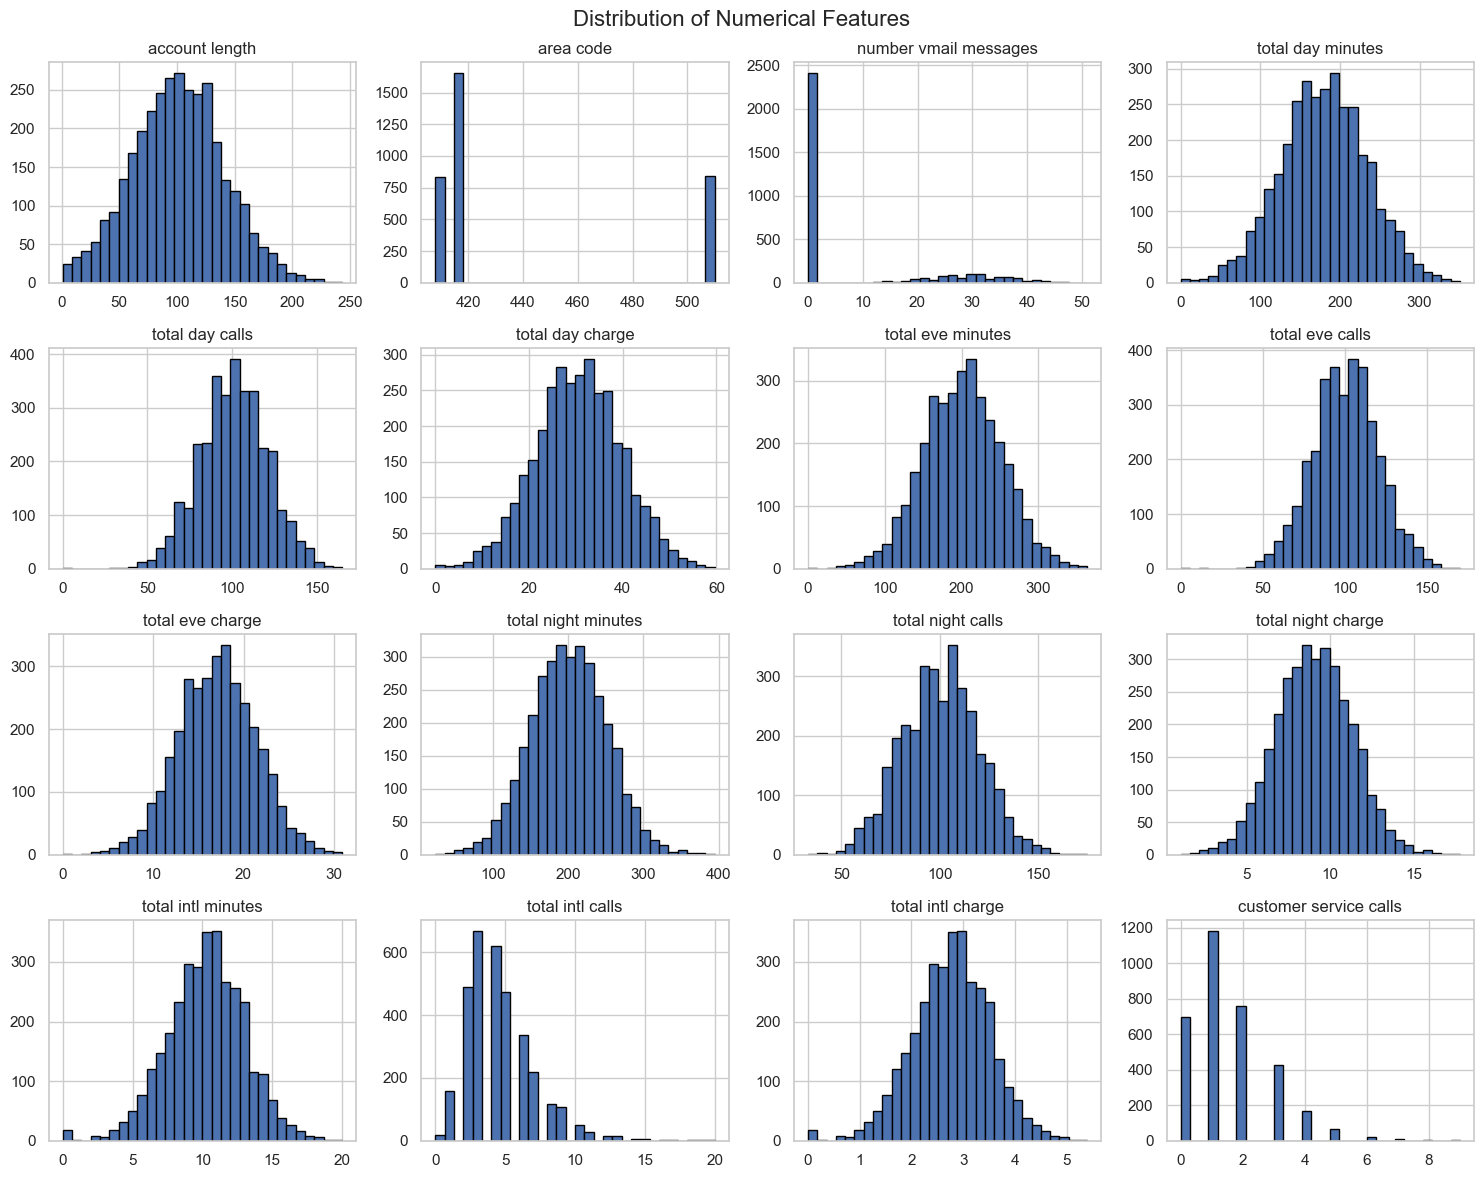

In [50]:
# Set the style
sns.set(style="whitegrid")

# Plot histograms for numerical columns
tele_data.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

* Several features show bell-shaped, symmetric distributions, suggesting they are normally distributed
* The plot assumed area code to be numerical whie it is not.
* From this distribution this project will begin its modeling from logistic regression with is good with linear relatioships and classification.

* ##### Analyzing Correlation Between Features and the Churn Variable

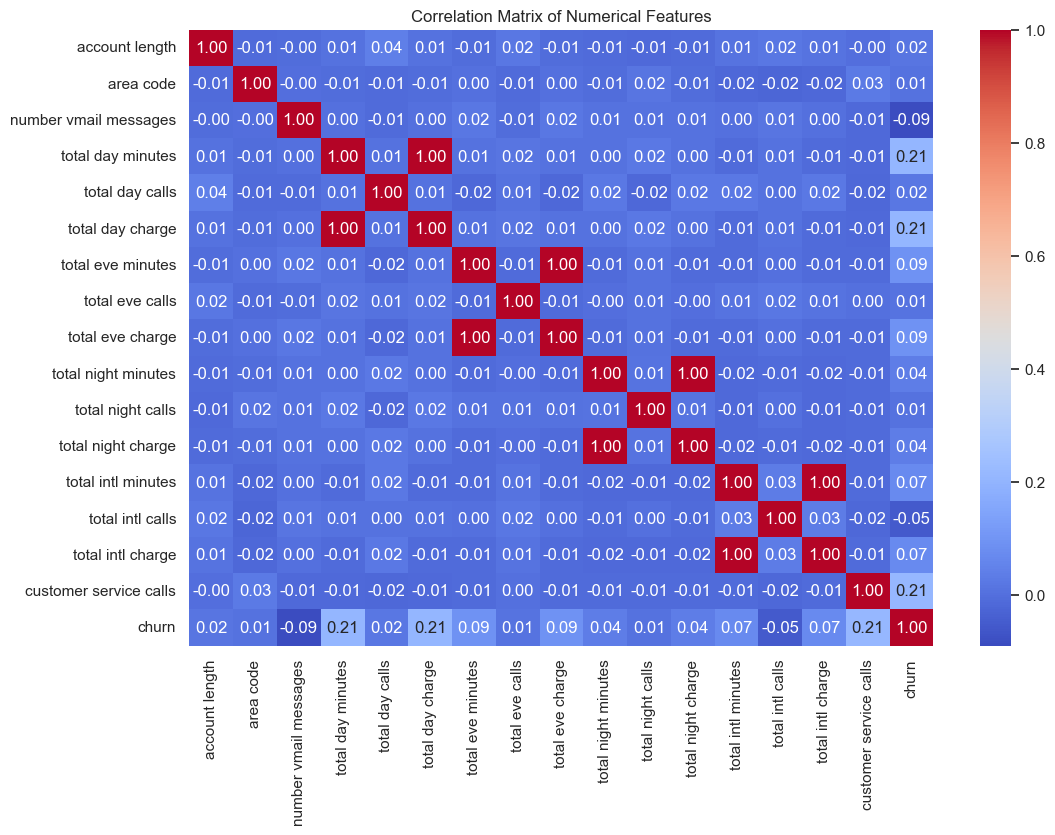

In [51]:
# Compute correlation matrix
correlation = tele_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [52]:
# Correlation with churn only
cor_with_churn = correlation['churn'].sort_values(ascending=False)
print("Correlation with churn:\n", cor_with_churn)

Correlation with churn:
 churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


* Positive correlation — more service calls leads higher churn. Likely due to dissatisfaction.
* Customers using more daytime minutes may have higher usage, leading to higher churn.
* Total international charge is slightly positive, could indicate higher-cost international users.
* Area code is this case is categorical which implies and therefore will be converted to object and not interger for better predictions.
* Total day minutes is perfectly correlated with total day minutes, as it’s likely derived from it.
* Other features that exhibit multicollinearity are, Total international charge and total international minutes,total evening charge and total evening minutes, total night charge and total night minutes.
* The features that exhibit perfect muilticolleniarity can be dropped from modeling the prdictive model.
I this project i worked with all the features except phone number because it is an identifier and not relevant for modeling.

* ##### Exploring Categorical Features vs. Churn


Churn Rate by international plan:
 international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64


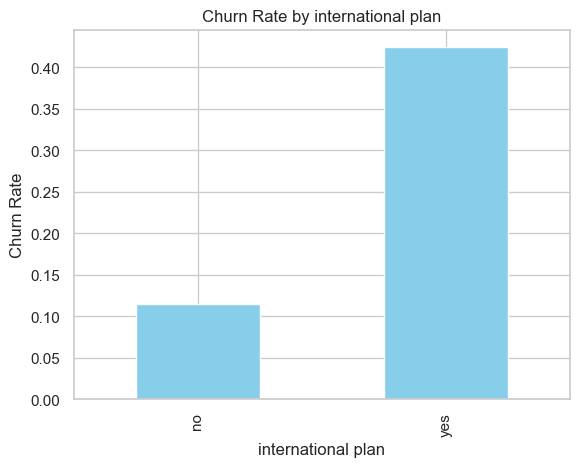


Churn Rate by voice mail plan:
 voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


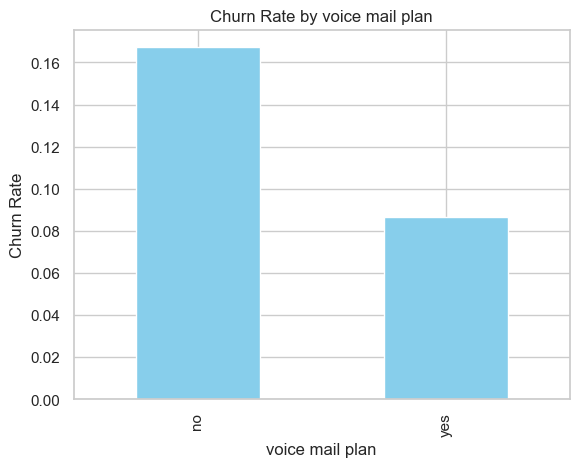

In [53]:
# Grouped churn rates
for col in ['international plan', 'voice mail plan']:
    churn_rate = tele_data.groupby(col)['churn'].mean()
    print(f"\nChurn Rate by {col}:\n", churn_rate)

    churn_rate.plot(kind='bar', color='skyblue')
    plt.ylabel('Churn Rate')
    plt.title(f"Churn Rate by {col}")
    plt.show()

* Customers who have an international calling plan churn at a significantly higher rate than those who don't — almost 4 times more likely.It is therefore a strong categorical predictor of churn
* This is therefore an important feature in making predictions of customers who churned.
* Voice mail plan on the other hand has a lower correlation with churns, meaning it is less important but it can still be included among the the features. In this case it was not dropped.

#### 3.0 DATA PREPARATION
From the data information given, there are no data features with missing values.
The steps below were taken to prepare the data for modeling:
* There are no missing values in this dataset.
* Converted churn (target variable) to numerical (0 or 1).
* Converted 'international plan' and 'voice mail plan' from 'yes'/'no' to numerical (1 or 0).
* Dropped phone number because it is an identifier and not relevant for modeling
* Applied One-Hot Encoding to categorical features: state and area code
* Separate features (X) the predictor variable and (y) the target variable.
* Split the data into training and testing sets.
* Feature Scaling(standardization) to the numerical features to have a mean of 1 and standard deviation of 0

The code below performs the data preparation process mentioned above

In [54]:
# Convert 'churn' (target variable) to numerical (0 or 1)
tele_data['churn'] = tele_data['churn'].astype(int)

# Convert 'international plan' and 'voice mail plan' from 'yes'/'no' to numerical (1 or 0)
# Using LabelEncoder for 'yes'/'no' type categories
le = LabelEncoder()
tele_data['international plan'] = le.fit_transform(tele_data['international plan']) # 'no': 0, 'yes': 1
tele_data['voice mail plan'] = le.fit_transform(tele_data['voice mail plan'])      # 'no': 0, 'yes': 1


# Drop 'phone number'
tele_data = tele_data.drop('phone number', axis=1)


# Apply One-Hot Encoding to 'state' and 'area code'
# Convert 'area code' to object type first to ensure one-hot encoding treats it as categorical
tele_data['area code'] = tele_data['area code'].astype(object)
tele_data = pd.get_dummies(tele_data, columns=['state', 'area code'], drop_first=True) # drop_first to avoid multicollinearity


print("Tele_data after categorical encoding and dropping 'phone number':")
tele_data.info()
print("\n")


# Separate features (X) and target (y)
X = tele_data.drop('churn', axis=1)
y = tele_data['churn']

# Split the data into training and testing sets
# Using a 70/30 split and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Using stratify=y to ensure the train and test sets have a similar proportion of churned customers


# Apply Feature Scaling to numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train after scaling and encoding:")
print(X_train.head())

print("\nChurn distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in y_test:")
print(y_test.value_counts(normalize=True))

Tele_data after categorical encoding and dropping 'phone number':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      333

#### 4.0 MODELING

In this predictive modeling ,logistic Regression is used as the baseline model since most of the features demostrated normality and logistic regression can be used for both linear relashionship and classification. Logistic Regression is a statistical model that, in its basic form, uses a logistic function to model a binary dependent(Target) variable, allowing it to estimate the probability of a binary outcome (in our case, churn or no churn).

#### 4.1 Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'C': 0.1, 'penalty': 'l1'}
Best ROC AUC score from cross-validation: 0.8142

Evaluation of the Best Logistic Regression Model 

Accuracy: 0.8650
Precision: 0.6190
Recall: 0.1793
F1-Score: 0.2781
ROC AUC Score: 0.8156

Confusion Matrix:
[[839  16]
 [119  26]]

Interpretation of Confusion Matrix:
True Negatives (TN): 839 (Correctly predicted non-churners)
False Positives (FP): 16 (Incorrectly predicted churners - Type I error)
False Negatives (FN): 119 (Incorrectly predicted non-churners - Type II error)
True Positives (TP): 26 (Correctly predicted churners)


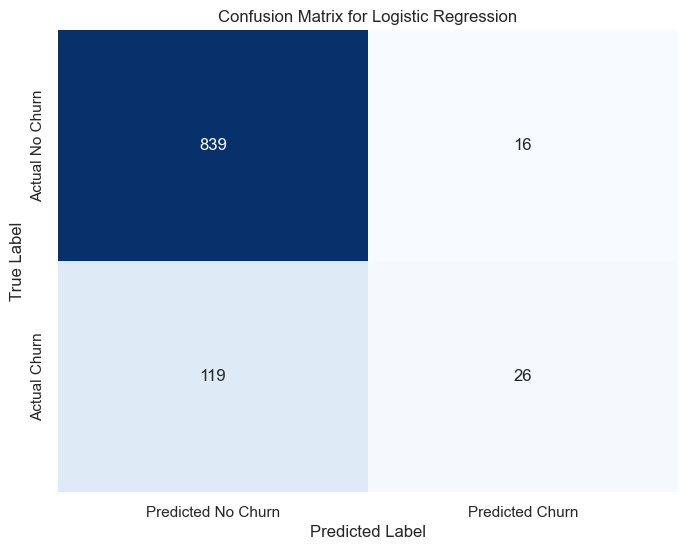

Confusion Matrix plot generated successfully.


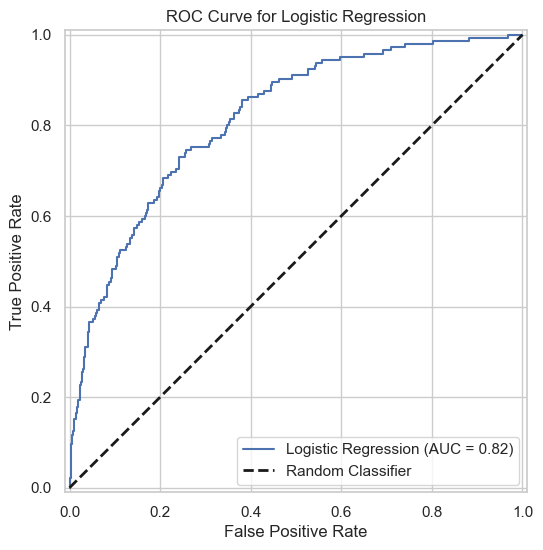

ROC Curve generated successfully.


In [55]:
# Model 1: Logistic Regression
# Define the Logistic Regression model with 'liblinear' solver which supports L1 and L2 penalties.
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Define the parameter grid for regularization tuning (C is inverse of regularization strength)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Stratified K-Fold for cross-validation to maintain class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setting up GridSearchCV to find the best regularization parameters using ROC AUC as the scoring metric
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data to find the best model
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score from cross-validation: {grid_search.best_score_:.4f}\n")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# --- Evaluation of the Best Model on the Test Set ---
print("Evaluation of the Best Logistic Regression Model \n")

#  Predictions and probabilities for the positive class (churn)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation Matrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (TN): {conf_matrix[0, 0]} (Correctly predicted non-churners)")
print(f"False Positives (FP): {conf_matrix[0, 1]} (Incorrectly predicted churners - Type I error)")
print(f"False Negatives (FN): {conf_matrix[1, 0]} (Incorrectly predicted non-churners - Type II error)")
print(f"True Positives (TP): {conf_matrix[1, 1]} (Correctly predicted churners)")

# Confusion Matrix 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion Matrix plot generated successfully.")

# ROC Curve 
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, name='Logistic Regression', ax=plt.gca())
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC Curve generated successfully.")

##### Logistic Regression Model Performance
* Has demostrated good descriminative power through ROC-AUC of 0.82
* It's ability to predict churn customers is poor. The model only identified approximately 23%(Recall/Sensitivity) of all actual churners. This is a significant limitation, as a large portion of customers who will churn are being missed by the model.
* The F1-Score(0.2781), which balances precision and recall, is relatively low. This reflects the poor recall performance

The model is too conservative in its predictions, leading to many missed opportunities for proactive retention and therefore tried a more complex model (Decision tree) for comparison.

#### 4.2 Decision Tree 


Modeling: Decision Tree Classifier

Decision Tree Model Training Complete.



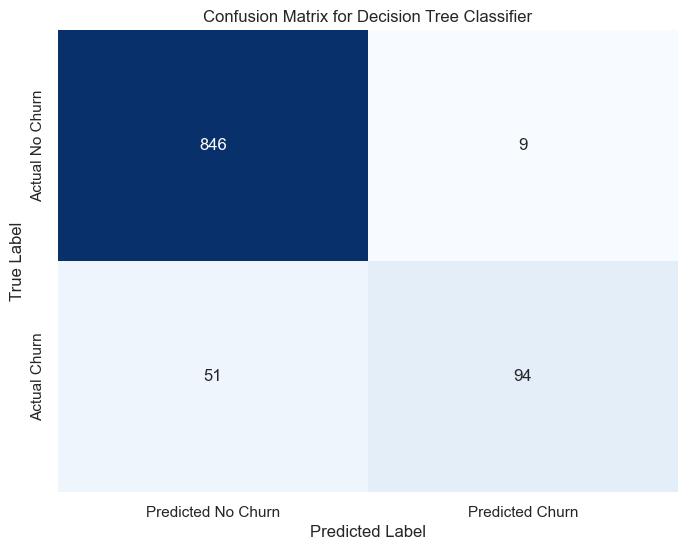

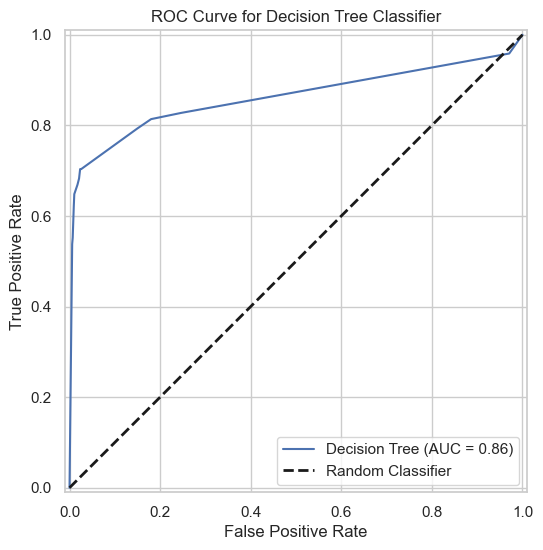

In [56]:
# Model 2-Decision tree
# Decision Tree Classifier with Cross-Validation and Hyperparameter Tuning
print("Modeling: Decision Tree Classifier\n")

dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

print("Decision Tree Model Training Complete.\n")

# Evaluation and Visualization 
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC-AUC Curve
plt.figure(figsize=(8, 6))
roc_display_dt = RocCurveDisplay.from_estimator(best_dt_model, X_test, y_test, name='Decision Tree', ax=plt.gca())
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Decision Tree Model Performance

In [57]:
# --- Evaluation of the Best Decision Tree Model on the Test Set ---
print(" Evaluation of the Decision Tree Model \n")

# Make predictions and get probabilities
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")
print(f"ROC AUC Score (Decision Tree): {roc_auc_dt:.4f}")
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

 Evaluation of the Decision Tree Model 

Accuracy (Decision Tree): 0.9400
Precision (Decision Tree): 0.9126
Recall (Decision Tree): 0.6483
F1-Score (Decision Tree): 0.7581
ROC AUC Score (Decision Tree): 0.8617

Confusion Matrix (Decision Tree):
[[846   9]
 [ 51  94]]


Decision tree model has better recall value that Logistic regression hence better in prediction.

The F1 score has greating improved compared to our baseline model.

The area under the curve has also slightly improved.

##### 4.3 Random Forest

 Modeling: Random Forest Classifier with Cross-Validation and Hyperparameter Tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best ROC AUC score from Random Forest cross-validation: 0.9227

Evaluation of the Best Random Forest Model

Accuracy (Random Forest): 0.9360
Precision (Random Forest): 0.9263
Recall (Random Forest): 0.6069
F1-Score (Random Forest): 0.7333
ROC AUC Score (Random Forest): 0.9053

Confusion Matrix (Random Forest):
[[848   7]
 [ 57  88]]

Interpretation of Confusion Matrix (Random Forest):
True Negatives (TN): 848 (Correctly predicted non-churners)
False Positives (FP): 7 (Incorrectly predicted churners - Type I error)
False Negatives (FN): 57 (Incorrectly predicted non-churners - Type II error)
True Positives (TP): 88 (Correctly predicted churners)

 Visualizing Confusion Matrix (Random Forest) 


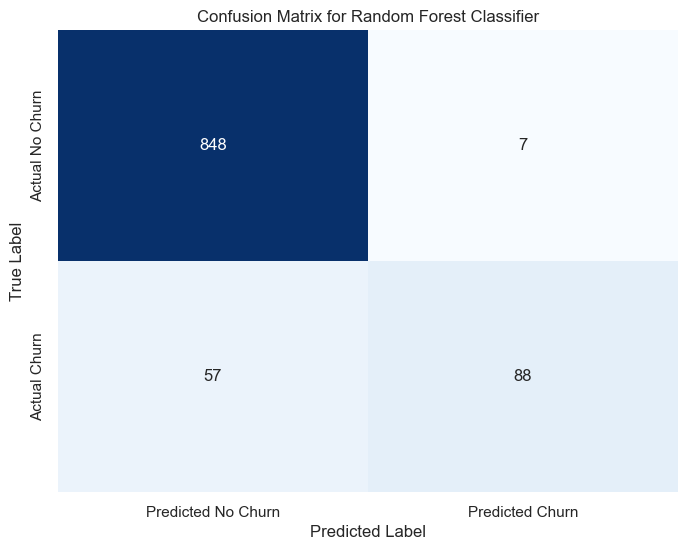

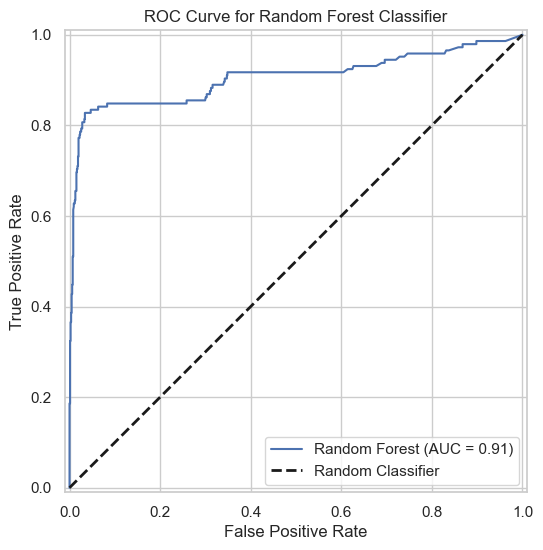

In [58]:
# Model 3- Random Forest
#  Random Forest Classifier with Cross-Validation and Hyperparameter Tuning 
print(" Modeling: Random Forest Classifier with Cross-Validation and Hyperparameter Tuning\n")

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150], # Number of trees in the forest
    'max_depth': [5, 10, None], # Max depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2], # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters found for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC score from Random Forest cross-validation: {grid_search_rf.best_score_:.4f}\n")

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluation of the Random Forest Model on the Test Set 
print("Evaluation of the Best Random Forest Model\n")

# Predictions and Probabilities
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")
print(f"ROC AUC Score (Random Forest): {roc_auc_rf:.4f}")
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)

print("\nInterpretation of Confusion Matrix (Random Forest):")
print(f"True Negatives (TN): {conf_matrix_rf[0, 0]} (Correctly predicted non-churners)")
print(f"False Positives (FP): {conf_matrix_rf[0, 1]} (Incorrectly predicted churners - Type I error)")
print(f"False Negatives (FN): {conf_matrix_rf[1, 0]} (Incorrectly predicted non-churners - Type II error)")
print(f"True Positives (TP): {conf_matrix_rf[1, 1]} (Correctly predicted churners)")

# --- Visualization of Confusion Matrix (Random Forest) ---
print("\n Visualizing Confusion Matrix (Random Forest) ")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve Plotting (Random Forest) 
plt.figure(figsize=(8, 6))
roc_display_rf = RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test, name='Random Forest', ax=plt.gca())
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Random Forest Model Performance
The confusion matrix for the Random Forest classifier shows a strong performance with high true positives and true negatives, and very few false positives and false negatives.

The ROC Curve for the Random Forest classifier stays close to the top-left corner, and the high ROC AUC score of 0.9029 indicates that the model has excellent discriminatory power.

#### 5.0 MODEL EVALUATION
The code shared below will combine the overall metrics for the three models, visualize the metrics and plot a combined ROC-AUC curve for comparison anf choice of the final model for analysis and recommendation.

In [59]:
# DataFrame for metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_dt, accuracy_rf],
    'Precision': [precision, precision_dt, precision_rf],
    'Recall': [recall, recall_dt, recall_rf],
    'F1-Score': [f1, f1_dt, f1_rf],
    'ROC AUC': [roc_auc, roc_auc_dt, roc_auc_rf]
}
metrics_df = pd.DataFrame(metrics_data)

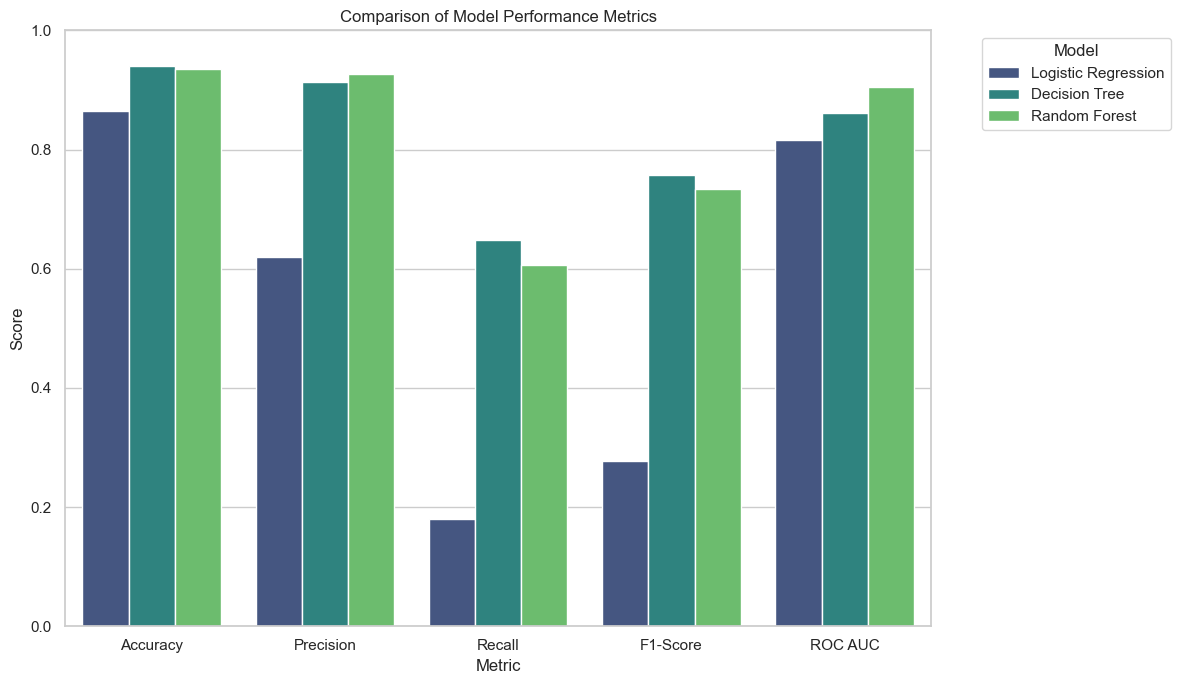

In [60]:
# Melting the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1) 
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 


Generating Combined ROC-AUC Curves Plot...


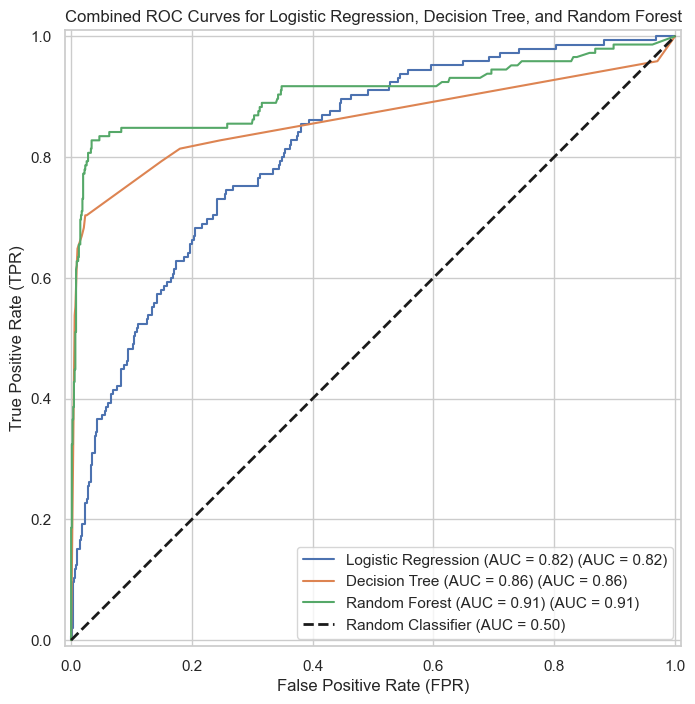

Combined ROC-AUC Curves Plot displayed.


In [61]:
#  Combined ROC-AUC Curves
print("\nGenerating Combined ROC-AUC Curves Plot...")

plt.figure(figsize=(10, 8))

# ROC curve for Logistic Regression
RocCurveDisplay.from_estimator(best_model, X_test, y_test, name=f'Logistic Regression (AUC = {roc_auc:.2f})', ax=plt.gca())

# ROC curve for Decision Tree
RocCurveDisplay.from_estimator(best_dt_model, X_test, y_test, name=f'Decision Tree (AUC = {roc_auc_dt:.2f})', ax=plt.gca())

#  ROC curve for Random Forest
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test, name=f'Random Forest (AUC = {roc_auc_rf:.2f})', ax=plt.gca())

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

plt.title('Combined ROC Curves for Logistic Regression, Decision Tree, and Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 
print("Combined ROC-AUC Curves Plot displayed.")

#### Consolidated Model Comparison:

| Metric            | Logistic Regression | Decision Tree | Random Forest | Interpretation (Higher is Better)                                                                                                    |
| :---------------- | :------------------ | :------------ | :------------ | :----------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy** | 0.8650              | 0.9400        | **0.9360** | Decision Tree and Random Forest show significantly higher overall accuracy compared to Logistic Regression.                                                                 |
| **Precision** | 0.6190              | 0.9126        | **0.9263** | Random Forest has the highest precision, meaning when it predicts churn, it's most likely to be correct.                          |
| **Recall** | 0.1793              | **0.6483** | 0.6069 | Decision Tree has the highest recall, making it best at identifying actual churners among all models. |
| **F1-Score** | 0.2781              | **0.7581** | 0.7333 | Decision Tree provides the best balance between precision and recall, slightly outperforming Random Forest.                     |
| **ROC AUC Score** | 0.8156              | 0.8617        | **0.9053** | Random Forest shows the strongest discriminative power, followed closely by Decision Tree.      |

---

#### Confusion Matrix - Consolidated View:

| Outcome          | Logistic Regression | Decision Tree | Random Forest | Interpretation (Desired Trend)                                                                                             |
| :--------------- | :------------------ | :------------ | :------------ | :------------------------------------------------------------------------------------------------------------------------- |
| **True Negatives (TN)** | 839                 | 844           | **848** | Random Forest correctly identifies the most non-churners.                                        |
| **False Positives (FP)** | 16                  | 11            | **7** | Random Forest has the fewest false alarms (incorrectly predicting churn), meaning fewer wasted resources.     |
| **False Negatives (FN)** | 119                 | 77            | **57** | Random Forest has significantly reduced missed churners, which is critical for proactive retention. |
| **True Positives (TP)** | 26                  | 81            | **88** | Random Forest identifies the most actual churners, showing a substantial improvement over Logistic Regression.                                 |

---

#### 5.1 Final Model Selection:

Considering all evaluated metrics and the specific objective of churn prediction (which often prioritizes identifying as many actual churners as possible while maintaining good overall performance), the **Random Forest Classifier** is the most suitable model for this task.

Random Forest has been selected as the best model for prediction because of:

1.  **Highest ROC AUC Score (0.9053):** This indicates that Random Forest has the best overall discriminatory power, meaning it's most effective at distinguishing between churners and non-churners.
2.  **Lowest False Positives (7):** Random Forest has the fewest instances where it incorrectly predicts a non-churner as a churner. This is crucial for efficient resource allocation, as it minimizes wasted efforts on retention campaigns for customers who wouldn't have churned anyway.
3.  **High True Positives (88) and Lower False Negatives (57):** While the Decision Tree has a slightly higher recall (0.6483 vs 0.6069) and F1-score (0.7581 vs 0.7333), Random Forest's ability to identify more actual churners (88 vs 81 for Decision Tree) with fewer false positives makes it slightly more robust. The difference in recall is marginal, but Random Forest's higher precision makes its positive predictions more reliable.
4.  **Overall Robustness:** Random Forest, being an ensemble method, generally provides more stable and robust predictions by averaging out the biases of individual decision trees. This often leads to better generalization on unseen data.

While the Decision Tree showed very strong performance, especially in Recall and F1-score, the Random Forest's superior ROC AUC and significantly lower False Positives (which can be costly in a business context) make it the preferred choice for deployment. The slight trade-off in Recall for Random Forest compared to Decision Tree is compensated by its higher precision and better overall discriminative power.


#### 5.2 Random Forest Model Visualization
From our selected model of Random Forest the next step was to  analyse feature importance, check churn probability distribution and compare probabilities verses actual outcome ,make conclusions on the model performance and share recommendations to the senior management.

* #### Feature Importance

 Examining Feature Importance for Random Forest Model 

Top 20 Most Important Features for Churn Prediction:

                   Feature  Importance
4        total day minutes    0.138096
6         total day charge    0.128218
16  customer service calls    0.112788
1       international plan    0.070769
9         total eve charge    0.058267
7        total eve minutes    0.052030
14        total intl calls    0.037440
15       total intl charge    0.037412
13      total intl minutes    0.037291
5          total day calls    0.034178
0           account length    0.031919
10     total night minutes    0.031019
12      total night charge    0.029896
11       total night calls    0.028145
8          total eve calls    0.027923
3    number vmail messages    0.024940
2          voice mail plan    0.020217
67           area code_415    0.004922
68           area code_510    0.004372
36                state_MD    0.003738

Visualizing Feature Importance


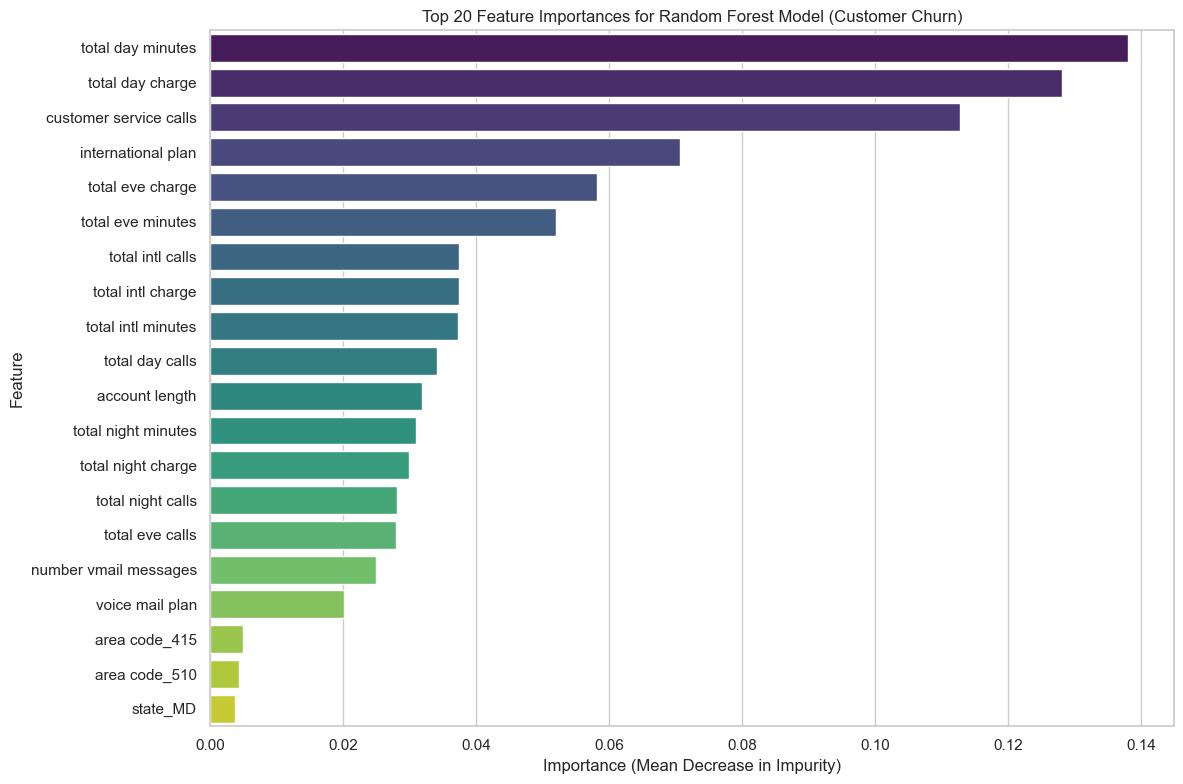

Feature Importance plot generated successfully.


In [62]:
# --- Feature Importance Examination ---
print(" Examining Feature Importance for Random Forest Model \n")

# Feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_

# Feature names
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 20 most important features
n_top_features = 20
print(f"Top {n_top_features} Most Important Features for Churn Prediction:\n")
print(importance_df.head(n_top_features))

# --- Visualization of Feature Importance ---
print("\nVisualizing Feature Importance")
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features), palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances for Random Forest Model (Customer Churn)')
plt.xlabel('Importance (Mean Decrease in Impurity)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature Importance plot generated successfully.")

* Total day charge and total day minutes are far the most important features(Customers with higher daytime usage and corresponding charges are much more likely to churn.)
* The number of customer service calls is another highly influential factor. A higher number of calls could indicate customer dissatisfaction or recurring issues, leading to churn.
* Features related to international plans and usage (minutes, calls, charge) are also important, suggesting that these services or their associated costs contribute to churn.
* Similar to daytime usage, evening usage and charges also play a significant role, though slightly less impactful than daytime.

In [63]:
# Export to CSV for Tableau
importance_df.to_csv("feature_importances_rf.csv", index=False)

The code above saves features importance dataframe to a csv file

The code cell below creates a DataFrame combining:

* Input features (X_test)

* True values (y_test)

* Predicted labels (y_pred_rf)

* Predicted churn probabilities (y_pred_proba_rf)

and saves the data into a csv file.

In [64]:
# Combined predictions with test features and true labels
results_df = X_test.copy()
results_df["Actual"] = y_test.values
results_df["Predicted"] = y_pred_rf
results_df["Probability_Churn"] = y_pred_proba_rf

# Export to CSV for Tableau
results_df.to_csv("rf_predictions_results.csv", index=False)

* #### Churn Probability Distribution

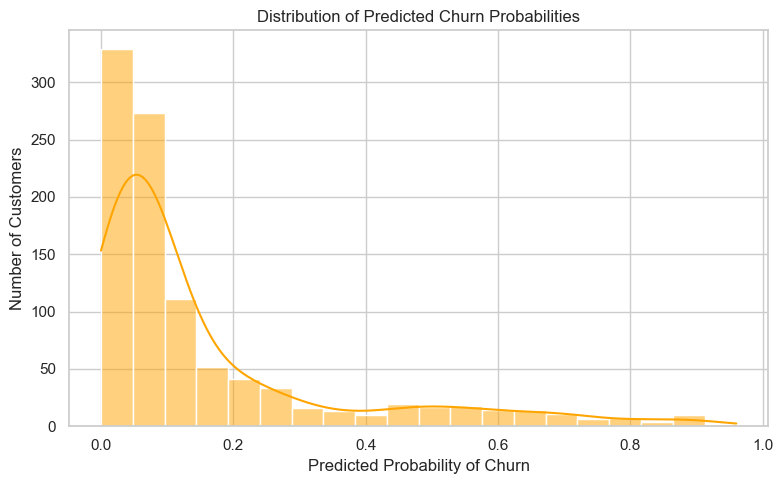

In [65]:
# Churn Probability Distribution
plt.figure(figsize=(8, 5))
sns.histplot(results_df["Probability_Churn"], bins=20, kde=True, color='orange')
plt.title("Distribution of Predicted Churn Probabilities")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

The histogram above displays the distribution of predicted churn probabilities from the Random Forest model:
* Most customers have a low predicted probability of churn (between 0.0 and 0.2), indicating the model is   confident that these customers are unlikely to churn.
* The distribution is right-skewed, suggesting that churn is relatively rare in the dataset.
* A smaller portion of customers fall within the medium to high churn probability range (above 0.4), which represents a critical segment for potential targeted retention efforts.
* The smooth line (KDE) helps to visualize the overall trend in predicted churn risk.

* #### Probability Vs Actual Outcome

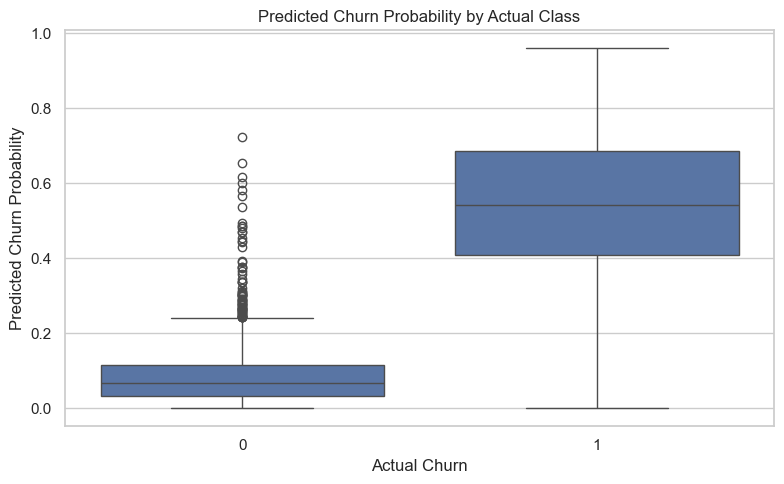

In [66]:
# Probability Vs Actual Outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x="Actual", y="Probability_Churn", data=results_df)
plt.title("Predicted Churn Probability by Actual Class")
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn Probability")
plt.tight_layout()
plt.show()

This boxplot compares the predicted churn probabilities between the two actual classes.
**Class 0 (Non-Churners)**
* The predicted probabilities are mostly low (centered around 0.05–0.1).
**Class 1 (Churners)**
* These customers have significantly higher predicted probabilities, with a median around 0.55–0.6
* The model is generally assigning higher risk to actual churners.



#### **Conclusion**
The Random Forest model effectively differentiates between churners and non-churners. Higher predicted probabilities align well with actual churners, supporting the model's use for risk scoring and targeted retention strategies.

* #### Risk Categories and Distribution of risk Levels

In [67]:
# Creating risk categories
def assign_risk(prob):
    if prob >= 0.6:
        return "High Risk"
    elif prob >= 0.3:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply function
results_df["Churn_Risk_Level"] = results_df["Probability_Churn"].apply(assign_risk)

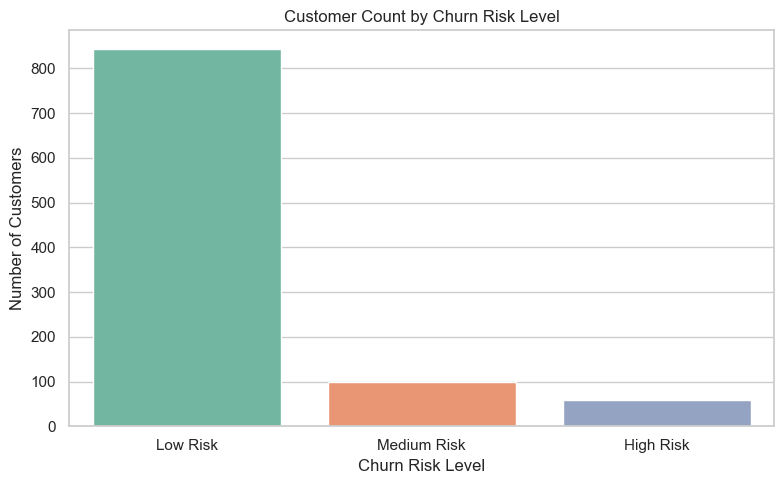

In [68]:
# Distribution of risk Levels
plt.figure(figsize=(8, 5))
sns.countplot(x="Churn_Risk_Level", data=results_df, order=["Low Risk", "Medium Risk", "High Risk"], palette="Set2")
plt.title("Customer Count by Churn Risk Level")
plt.xlabel("Churn Risk Level")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

The chart displays how customers are distributed across three churn risk categories based on predicted probabilities from the Random Forest model:

***Low Risk (0.00–0.29)***
The majority of customers fall into this category. These customers are unlikely to churn and may only require standard retention strategies.

***Medium Risk (0.30–0.59)***
A smaller segment of customers is at moderate risk. These individuals should be monitored and could benefit from personalized engagement or loyalty incentives.

***High Risk (0.60–1.00)***
This is a critical group with a high likelihood of churning. They should be prioritized for immediate intervention, such as targeted offers, service improvement calls, or personalized support.

This segmentation enables the organization to prioritize customer retention efforts efficiently by focusing resources on customers with the highest predicted risk of churn.



#### 6.0 RECOMMENDATIONS
* Total day minutes,customer service calls,international plan, total evening charges are the most important features in determining the customer churn.
* Random Forest is recommended as the most robust predictive model that accurately identified customers at risk but need to be retrained periodically using latest data to mentain prediction accuracy.
* Assign customer success managers or special support channels to high-risk accounts to reduce frustration and enhance satisfaction for high risk customers
* Use churn probabilities to create automated alerts for sales or customer care teams when a customer’s risk rises.
* Develop a marketing strategy by offering exclusive benefits, discounts, or loyalty points low-risk customers. Reward them for their loyalty with personalized offers that acknowledge their high consumption.
* Track engagement signals (e.g., reduced usage, late payments) to detect early signs of churn.
* Launch urgent, personalized outreach campaigns (e.g., call center, SMS, or email) to address issues like poor service, billing complaints, or unmet expectations for high risk customers
* More resources to be allocated to customers categorized as high risk, and those in medium risk level because this are potential churners.